In [2]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import importlib
import lib
importlib.reload(lib)

remote_machine = "swystems.xdp1"
remote_base_dir = "/users/mdr/det-bypass/"
def remote_path(file,machine=remote_machine):
    return f"{machine}:{remote_base_dir}{file}"
plt.close()

In [3]:
%matplotlib widget

## SAP cluster tests

In [2]:
%matplotlib widget

In [3]:
settings = lib.Settings(1e6, 1e5, isol="no", kernel="6.6.19")

In [21]:
ts = lib.parse_timestamps("../../build/xdp/pingpong_xsk.dat")
# ts = lib.parse_timestamps("../data/poll_1M_100us.dat")
diffs = lib.compute_diffs(ts)
lats = lib.compute_latencies(ts)
# jitters = lib.compute_jitter(lats)

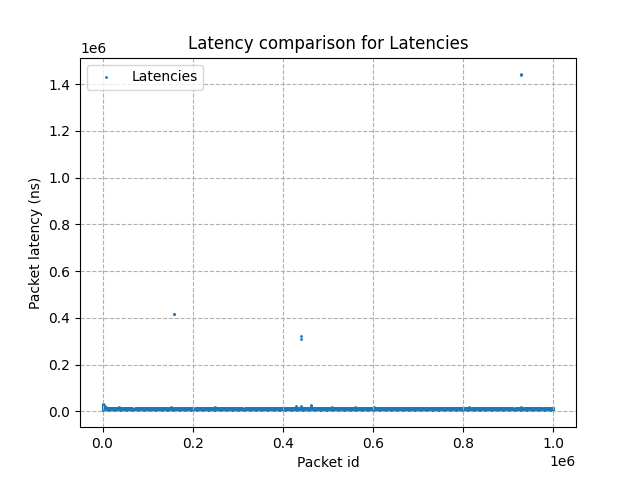

In [22]:
lib.plot_latencies((lats, "Latencies"), iters=settings.iters)

Using threshold 15238.78276116871ns


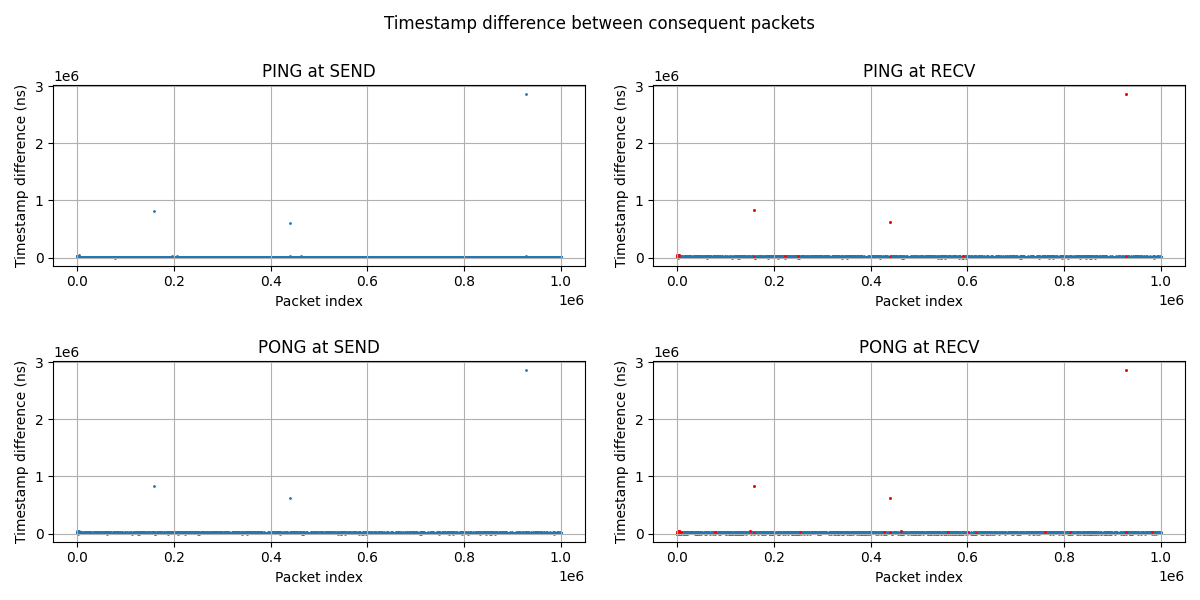

In [23]:
lib.plot_diffs(diffs, iters=settings.iters)

In [7]:
ts[:,3].size

1000000

### Coalecensce effect
Adaptive interrupt coalencensce has an impact on latency which is throughput-dependent and forms peculiar patterns.

In [7]:
ts1 = lib.parse_timestamps("../data/xdp/xsk_1M_10us_adaptiverx-on-1.dat")
diffs1 = lib.compute_diffs(ts1)
lats1 = lib.compute_latencies(ts1)
# jitters = lib.compute_jitter(lats)

FileNotFoundError: [Errno 2] No such file or directory: '../data/xdp/xsk_1M_10us_adaptiverx-on-1.dat'

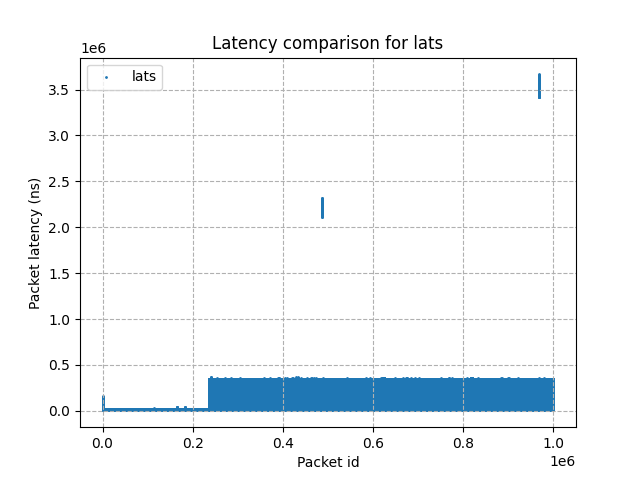

In [9]:
lib.plot_latencies((lats1, "lats"), iters=settings.iters)

Using threshold 132653.4865527861ns


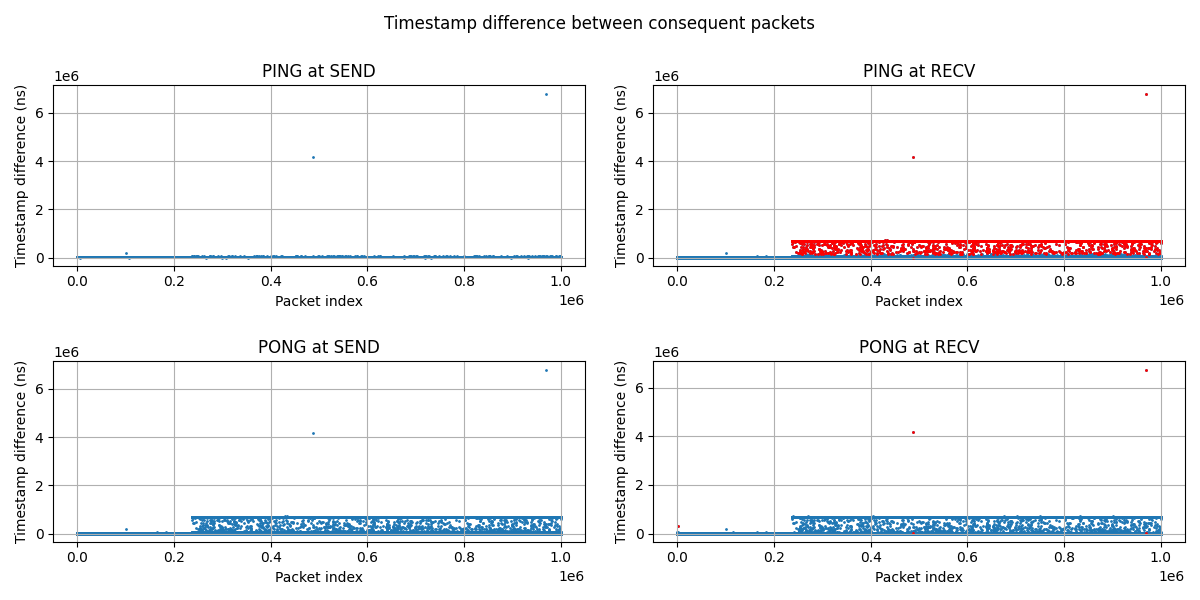

In [10]:
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 44612.63370669846ns


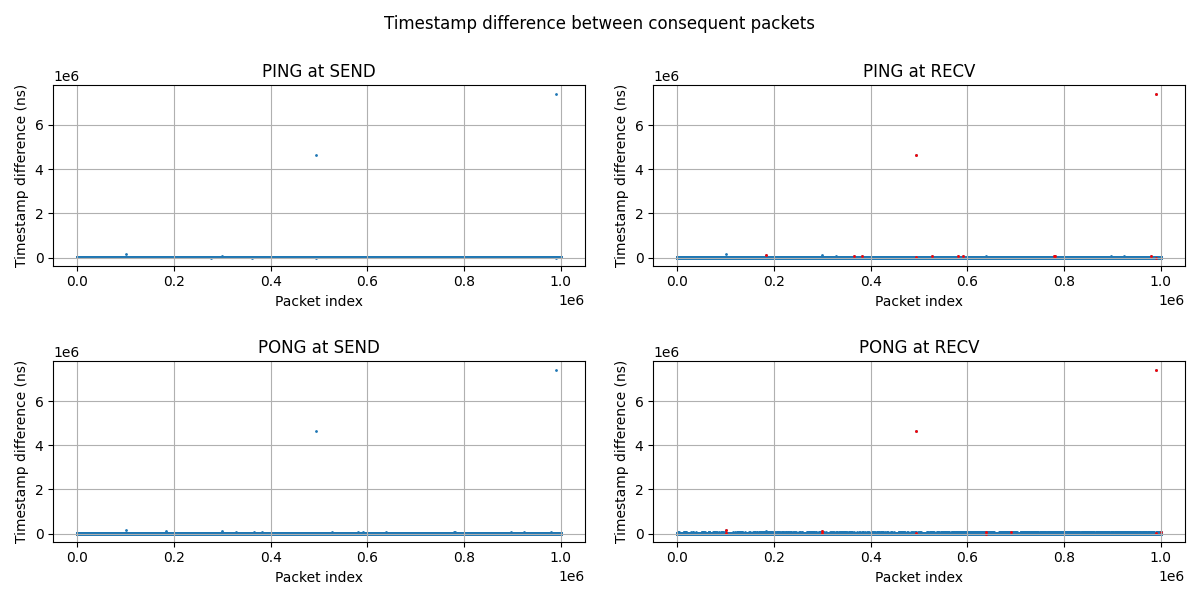

In [11]:
ts1 = lib.parse_timestamps("../data/xsk_1M_10us_adaptiverx-off.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 878424295543.057ns


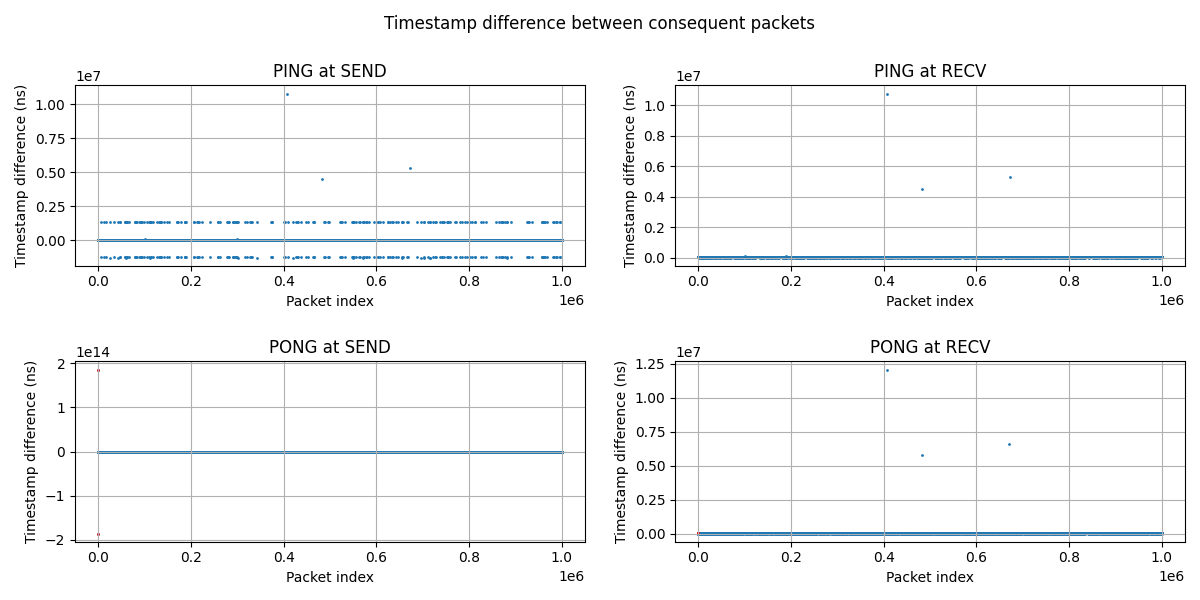

In [12]:
ts1 = lib.parse_timestamps("../data/poll_1M_10us_adaptivetx-on.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 52437.44236404629ns


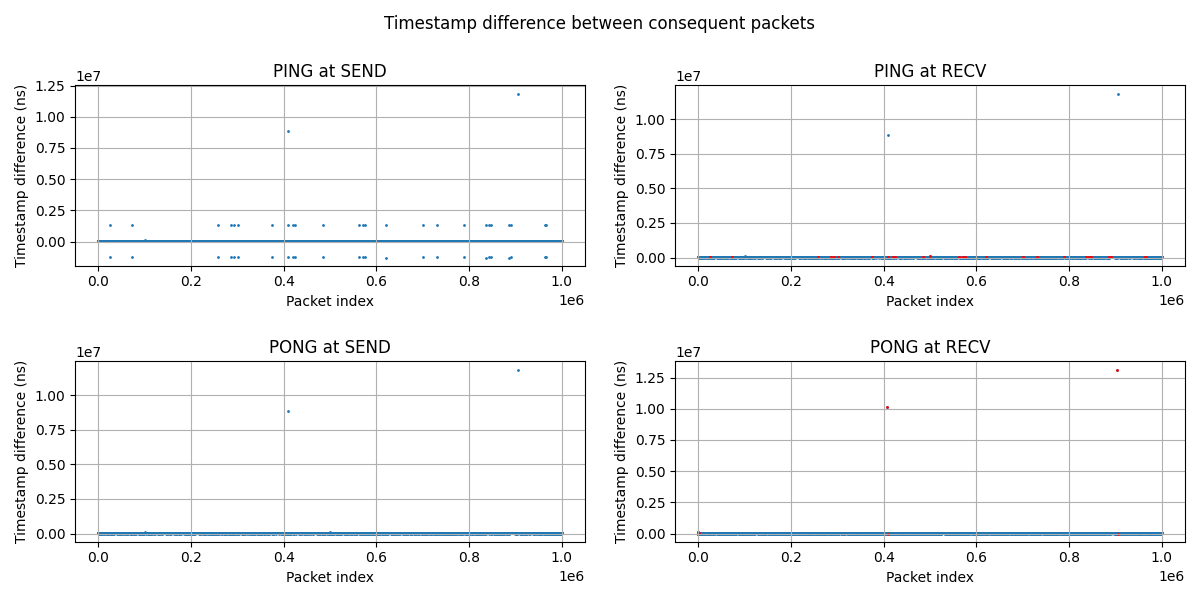

In [13]:
ts1 = lib.parse_timestamps("../data/poll_1M_10us_adaptivetx-on-2.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

### Long periodic effect
Another, separate effect appears with periodic outliers rather. It seems to be time-dependent rather than # of packet dependent as observed previously.

In [8]:
ts1 = lib.parse_timestamps("../data/xdp/poll_1M_100us.dat")
diffs1 = lib.compute_diffs(ts1)
lats1 = lib.compute_latencies(ts1)
# jitters = lib.compute_jitter(lats)

FileNotFoundError: [Errno 2] No such file or directory: '../data/xdp/poll_1M_100us.dat'

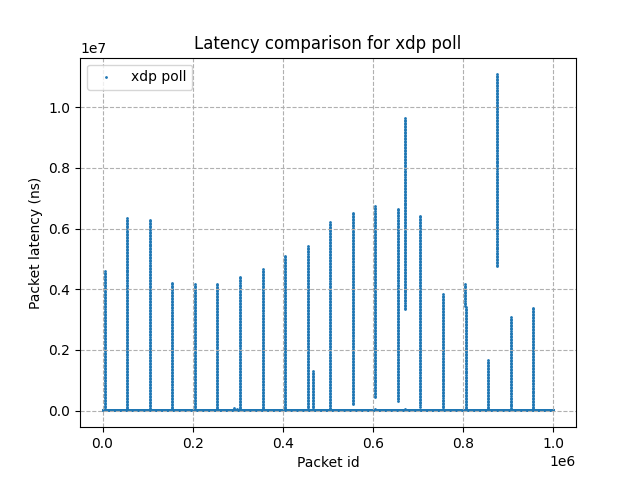

In [15]:
lib.plot_latencies((lats1, "xdp poll"), iters=settings.iters)

Using threshold 93549.31730408786ns


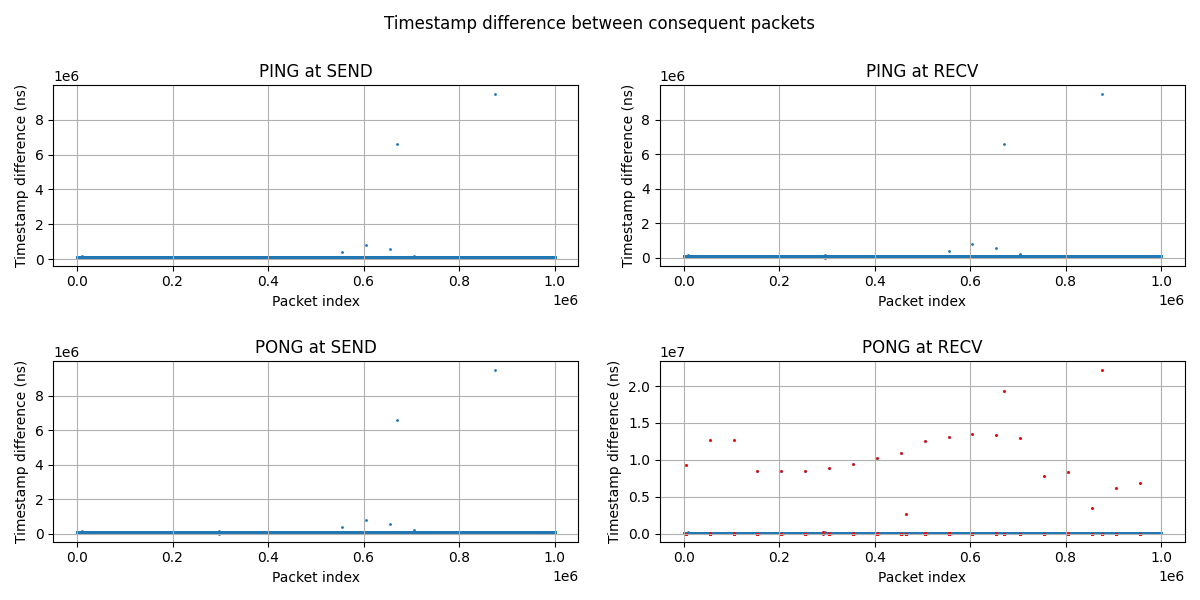

In [16]:
lib.plot_diffs(diffs1, iters=settings.iters)

In [17]:
ts1 = lib.parse_timestamps("../data/xsk_1M_100us.dat")
diffs1 = lib.compute_diffs(ts1)
lats1 = lib.compute_latencies(ts1)
# jitters = lib.compute_jitter(lats)

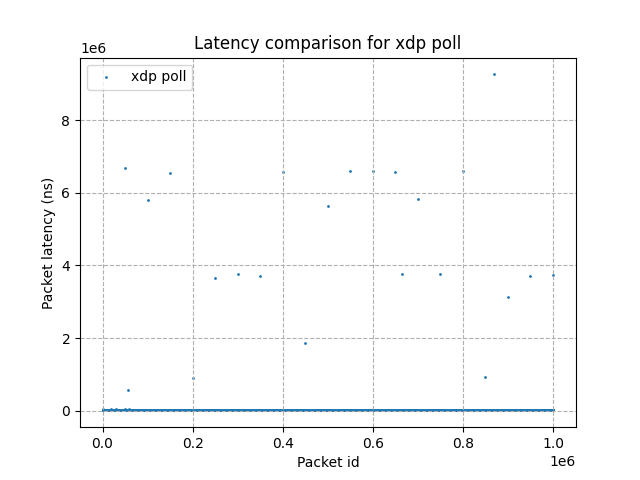

In [18]:
lib.plot_latencies((lats1, "xdp poll"), iters=settings.iters)

Using threshold 117161.42129868311ns


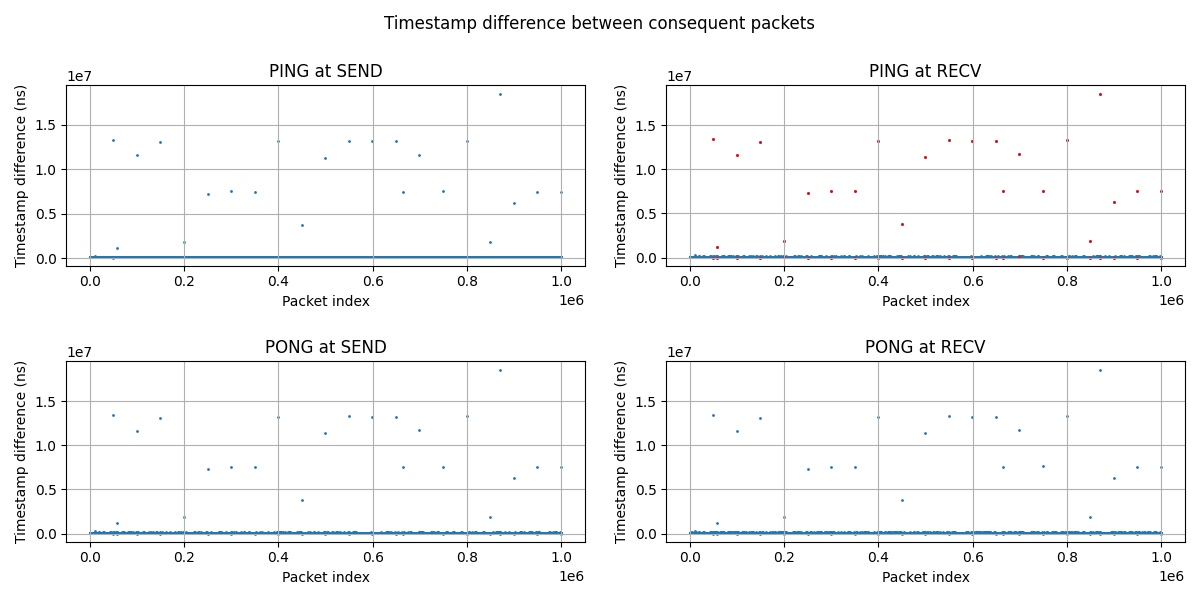

In [19]:
lib.plot_diffs(diffs1, iters=settings.iters)

Using threshold 81916.38733930785ns


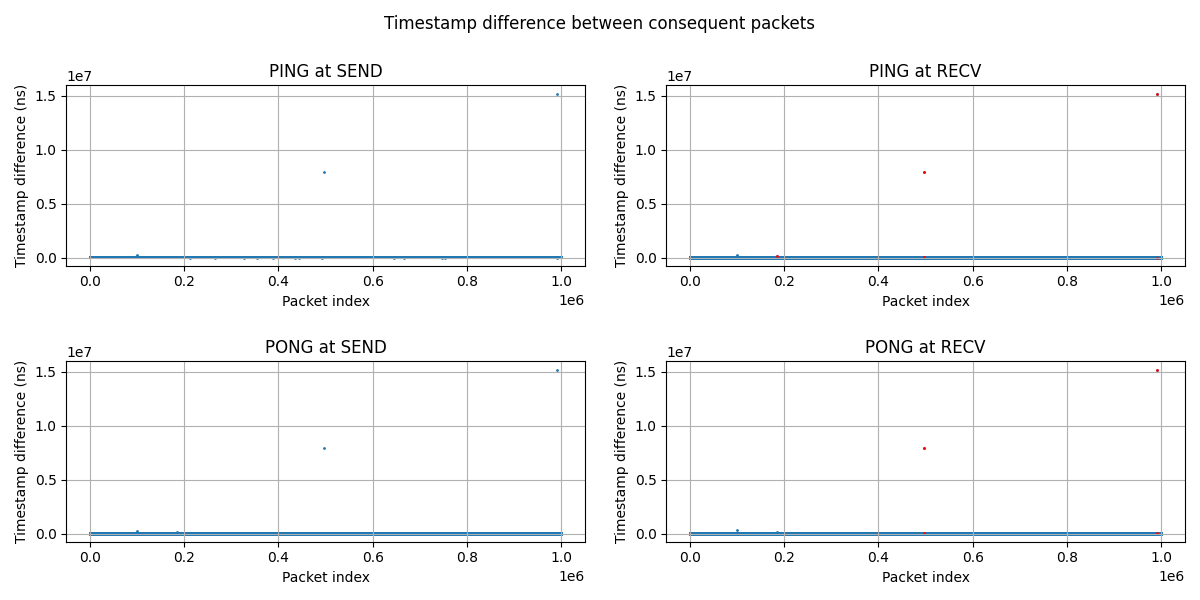

In [20]:
ts1 = lib.parse_timestamps("../data/xsk_300k_10us_off.dat")
diffs1 = lib.compute_diffs(ts1)
lib.plot_diffs(diffs1, iters=settings.iters)

## Cloudlab experiments 23/04/24 onwards

In [3]:
settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")

/home/davide/repos/det-bypass/analysis/comparison/lib.py:161: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(2, 2, figsize=(12, 6), layout="constrained")


Using threshold 9373.200313907955ns


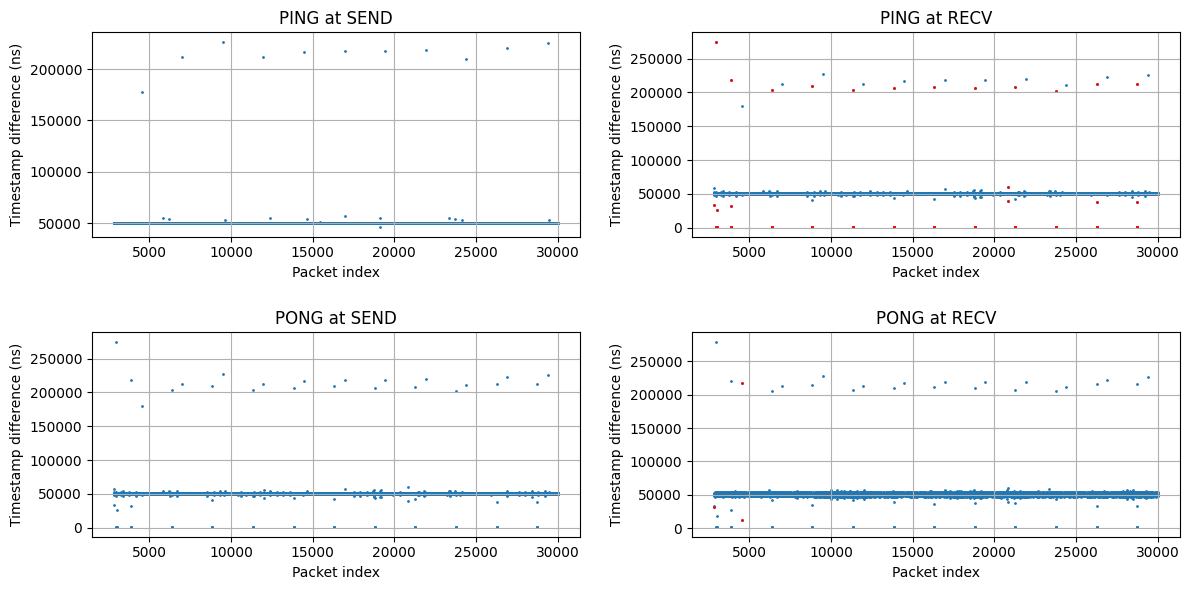

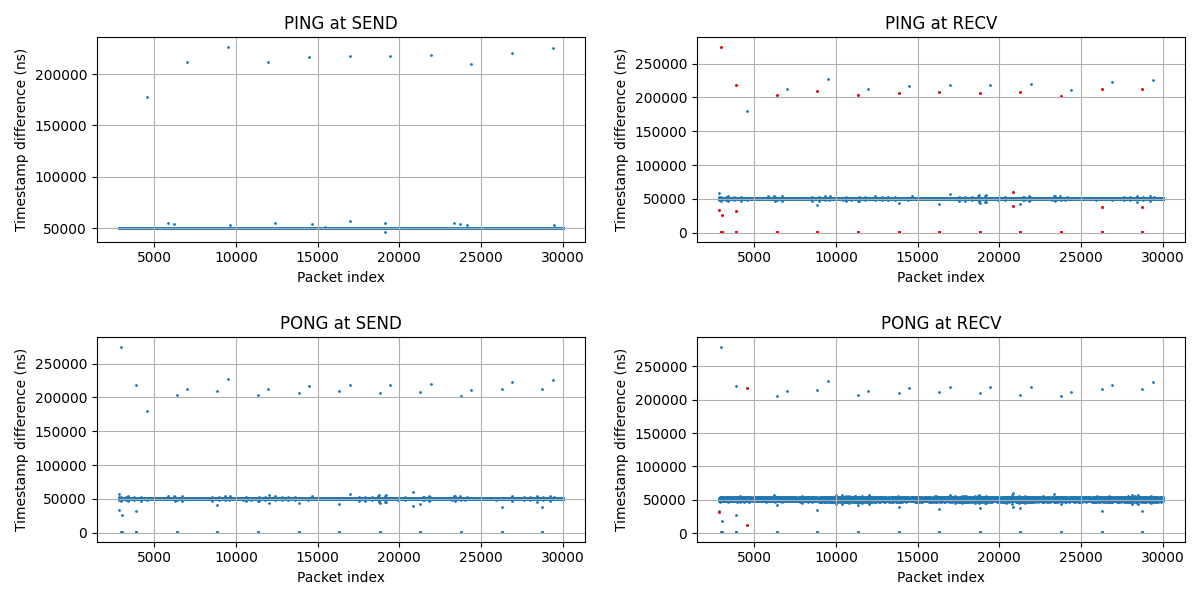

In [30]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_30k_50us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs)

Using threshold 13597.04214459827ns


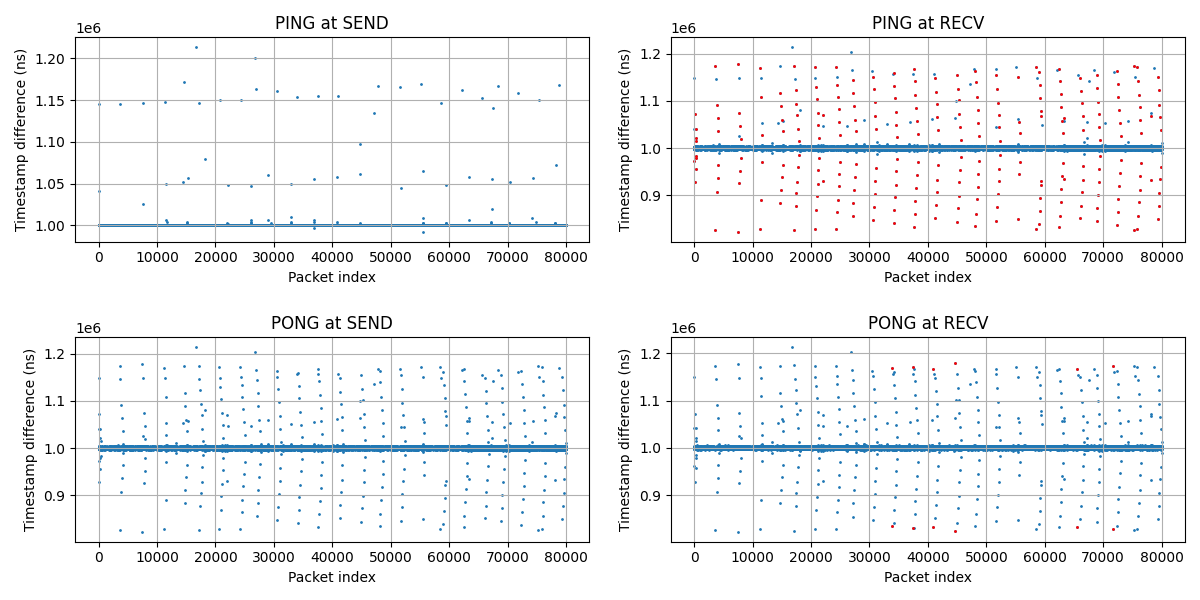

In [9]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/pure_80k_1ms_fullisol.dat")
diffs = lib.compute_diffs(ts)
plot = lib.plot_diffs(diffs, iters=30000)

Using threshold 17054.26071630578ns


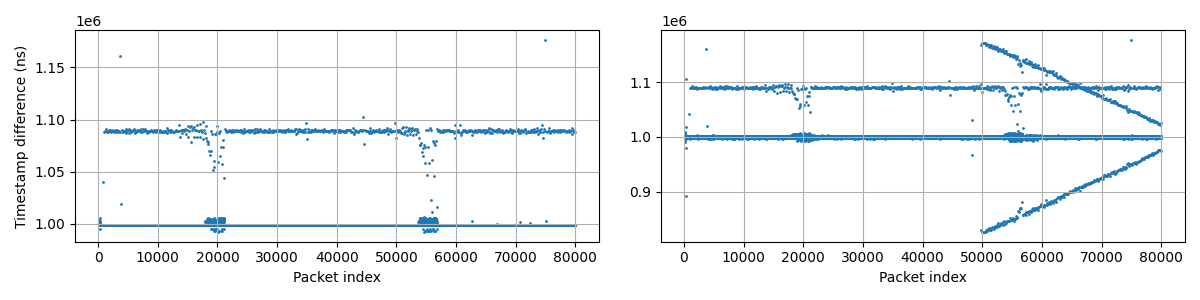

In [106]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
name = "../data-0424/xsk_80k_999us_powermax_4"
ts = lib.parse_timestamps(name + ".dat")
diffs = lib.compute_diffs(ts)
fig = lib.plot_diffs_top(diffs)
fig.savefig(name + ".png")


Using threshold 11770.624709292257ns


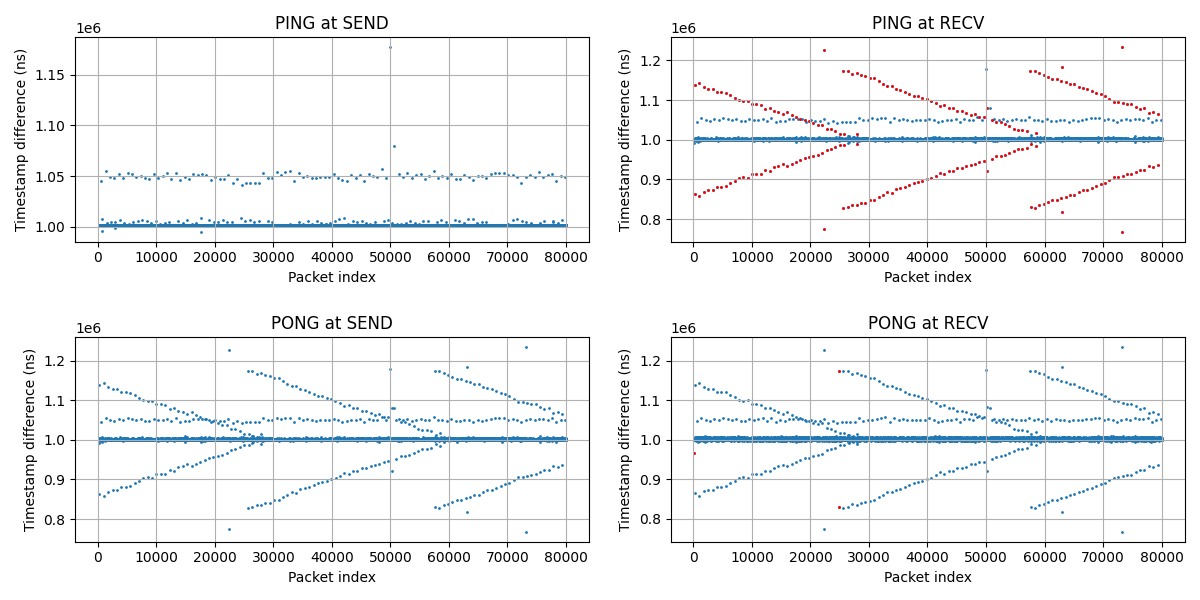

In [75]:
name = "../data-0424/xsk_80k_1001us_powermax"
ts = lib.parse_timestamps(name + ".dat")
diffs = lib.compute_diffs(ts)
fig = lib.plot_diffs(diffs, iters=settings.iters)
fig.savefig(name + ".png")

Using threshold 11770.624709292257ns


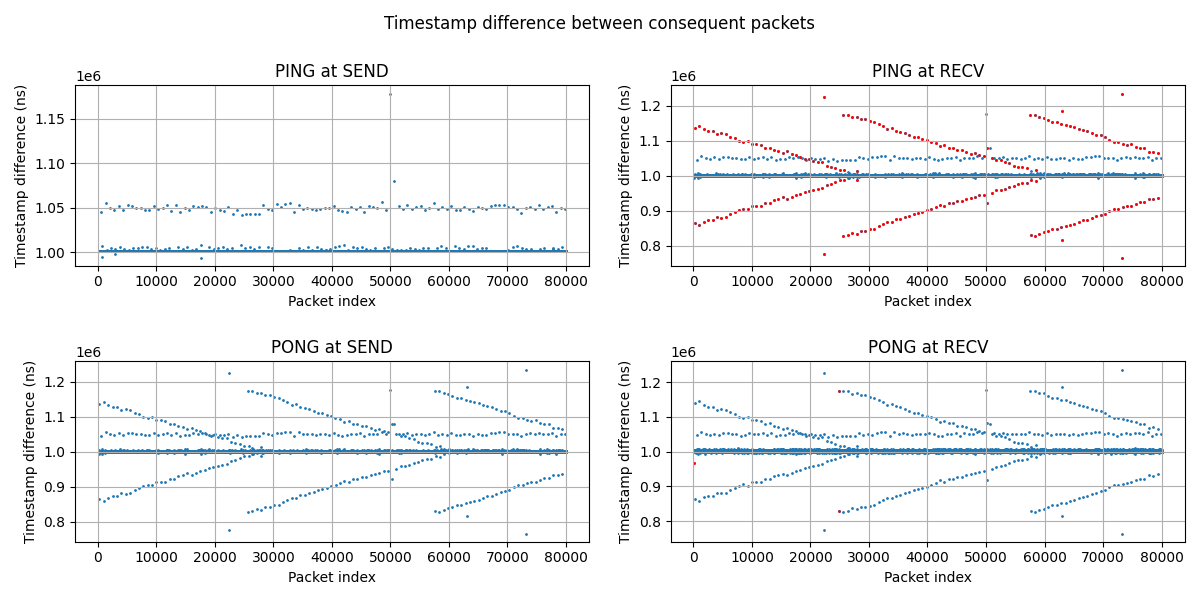

In [15]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_80k_1001us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 10593.550749815542ns


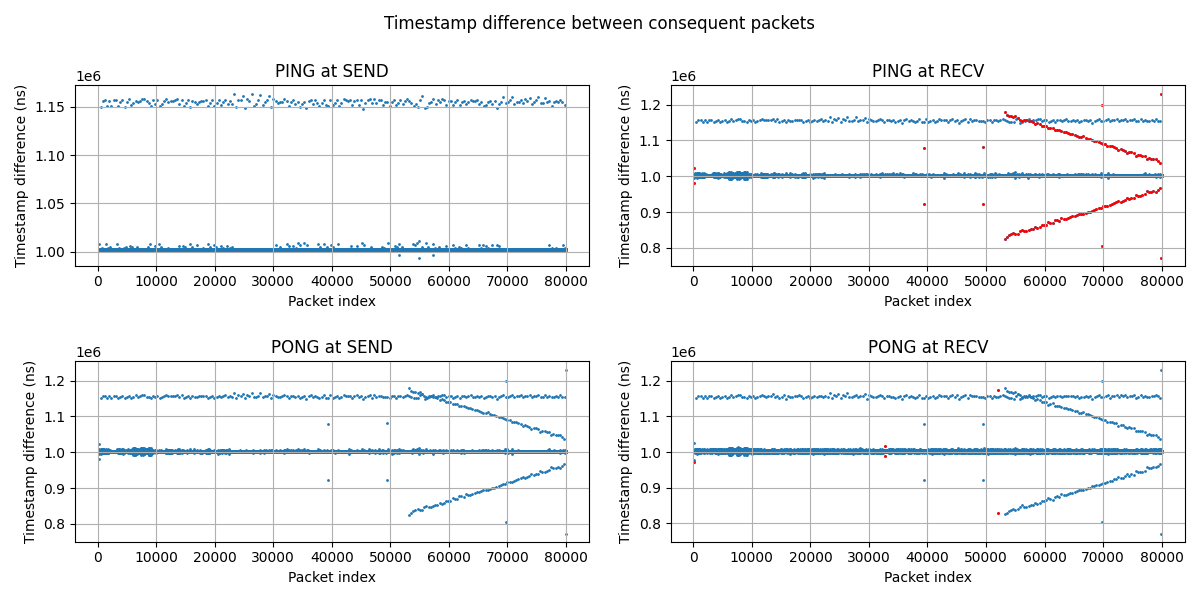

In [16]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_80k_1005us_powermax_2.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 40278.25704387873ns


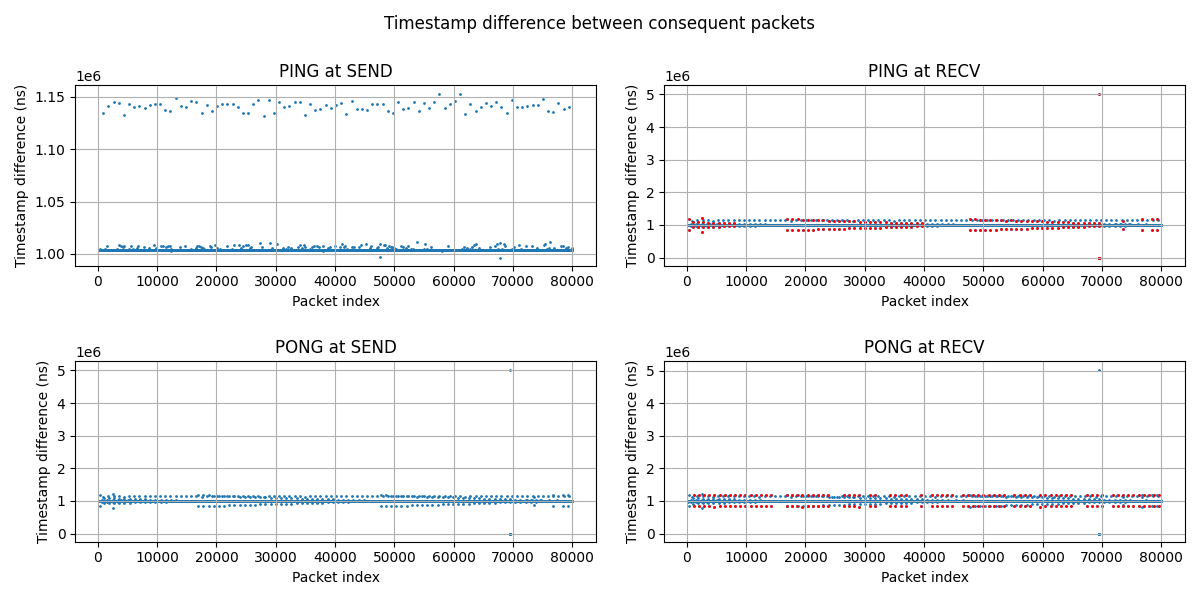

In [8]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_80k_1003us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 15246.036200227732ns


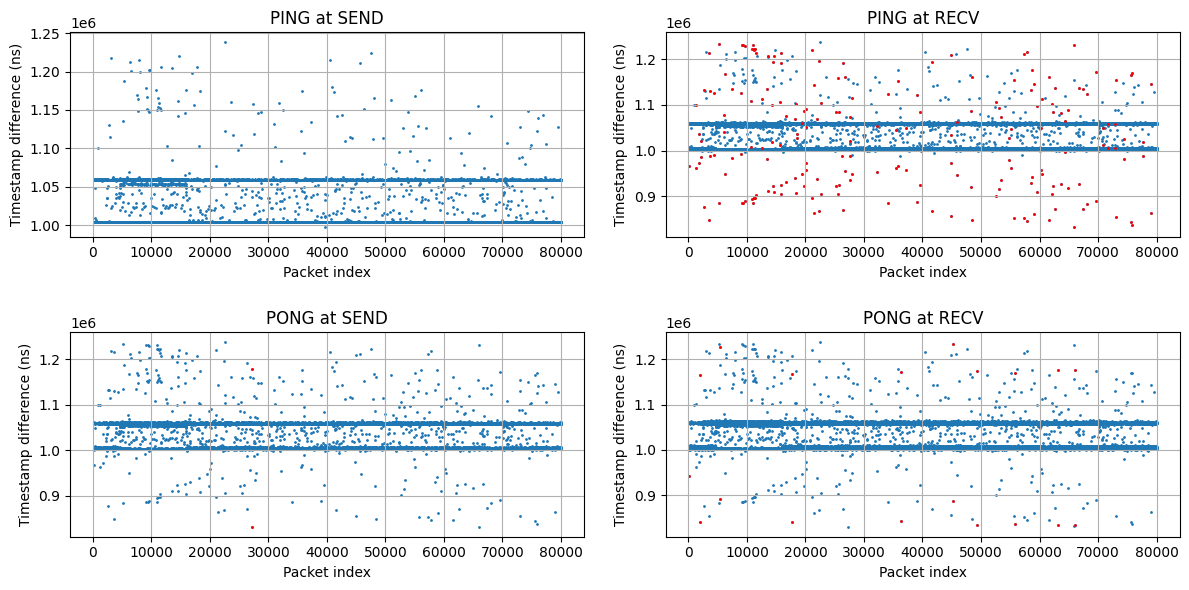

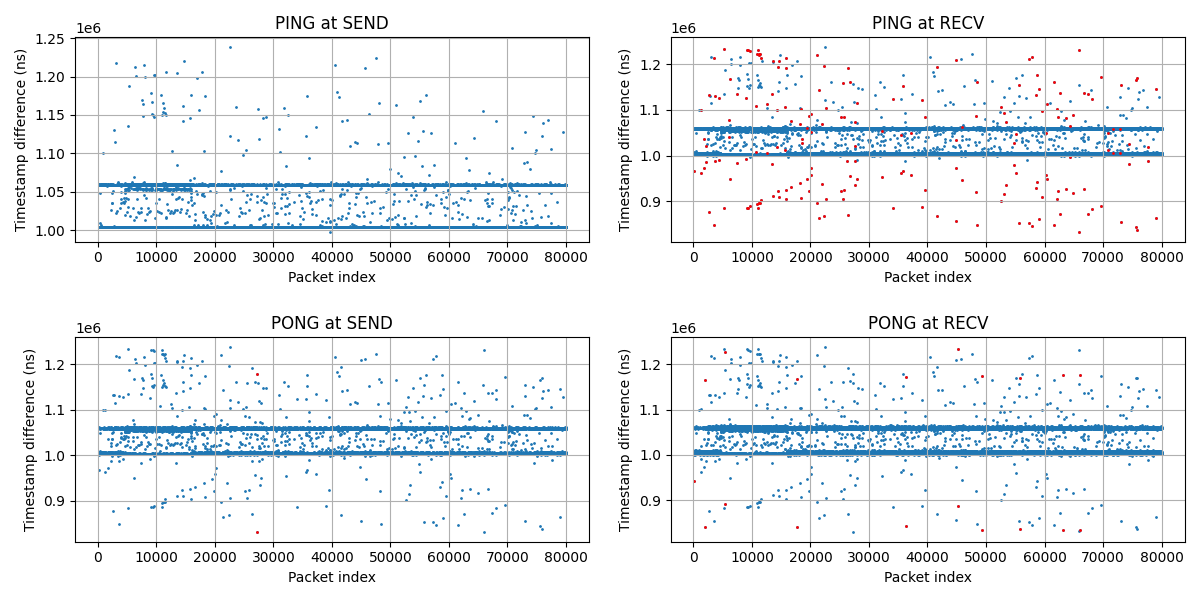

In [23]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_80k_1004us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 15012.039454951453ns


1060334.37

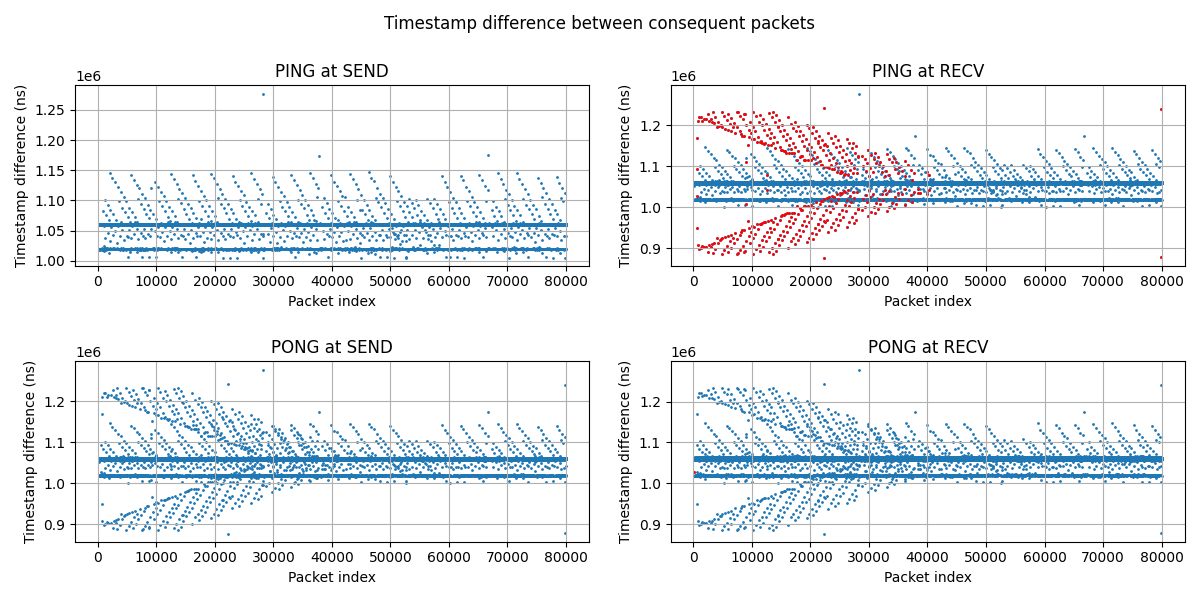

In [14]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_80k_1005us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)
np.percentile(diffs[:,1],99)


Using threshold 12612.390671580588ns


1060998.0

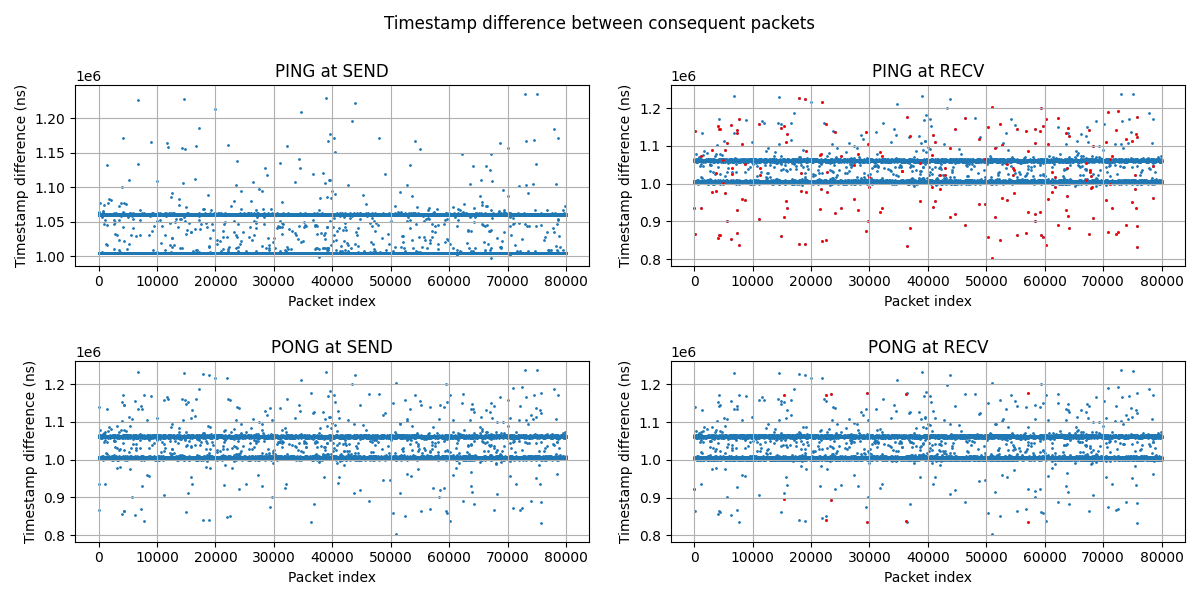

In [20]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/pure_80k_1005us_fullisol.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)
np.percentile(diffs[:,1],99)


Using threshold 2428.1696980614033ns


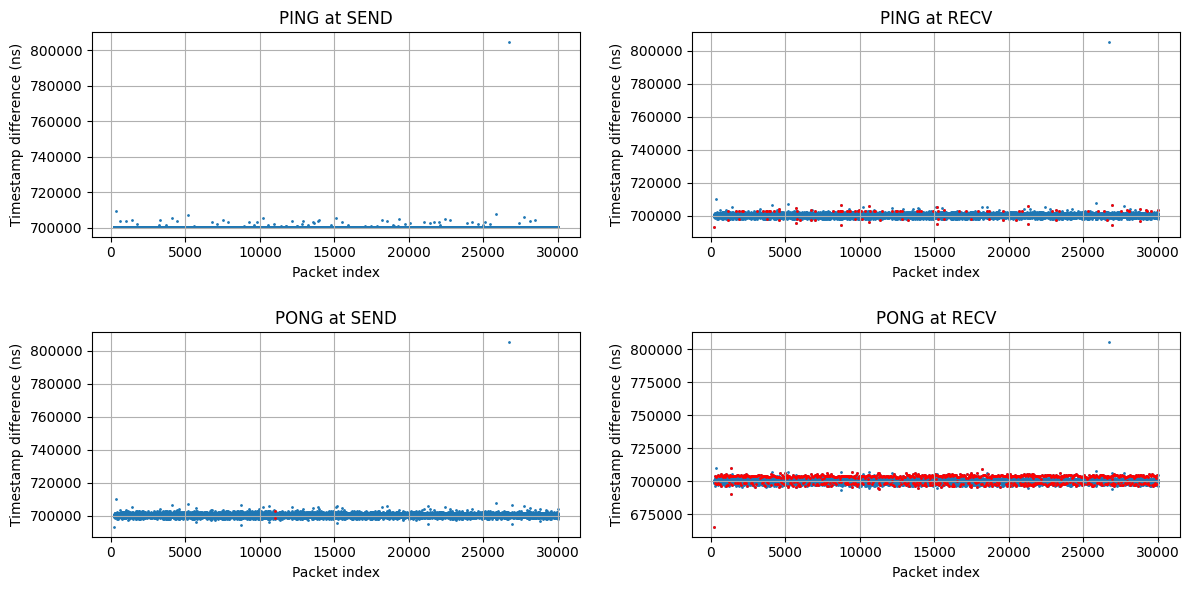

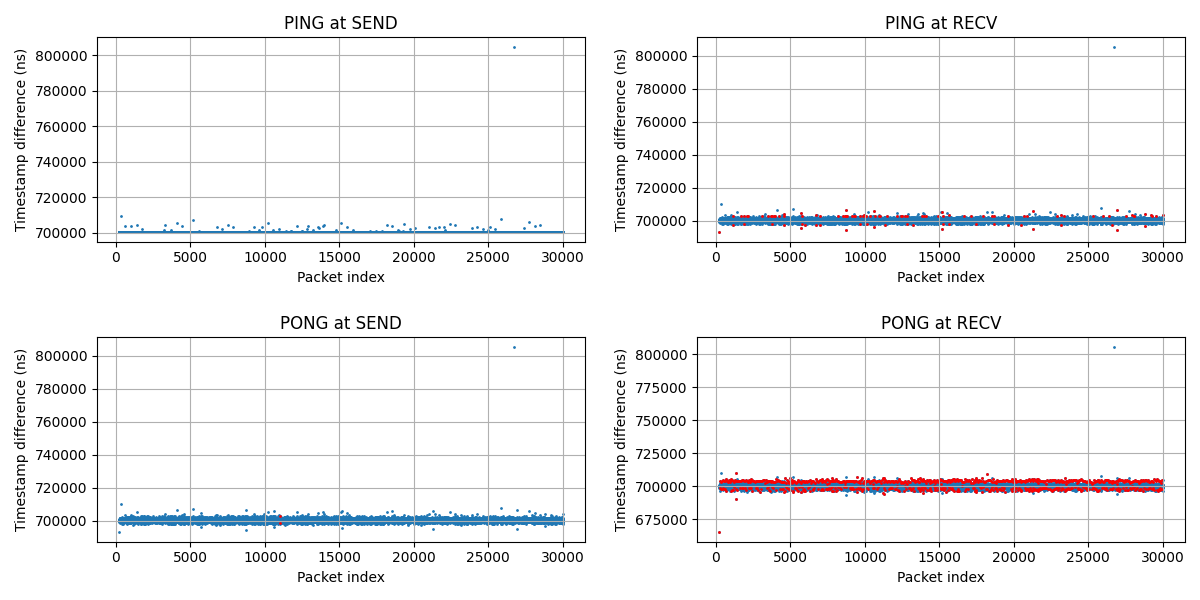

In [103]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_30k_700us_powermax_4.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 16601.002100171856ns


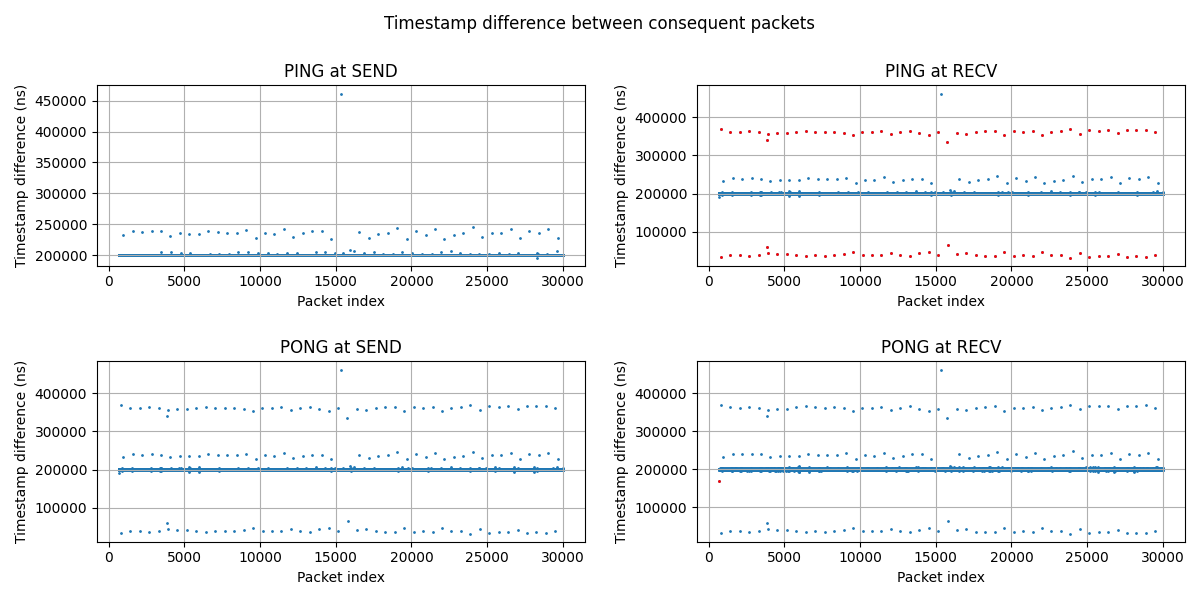

In [28]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_30k_200us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 11956.404988049055ns


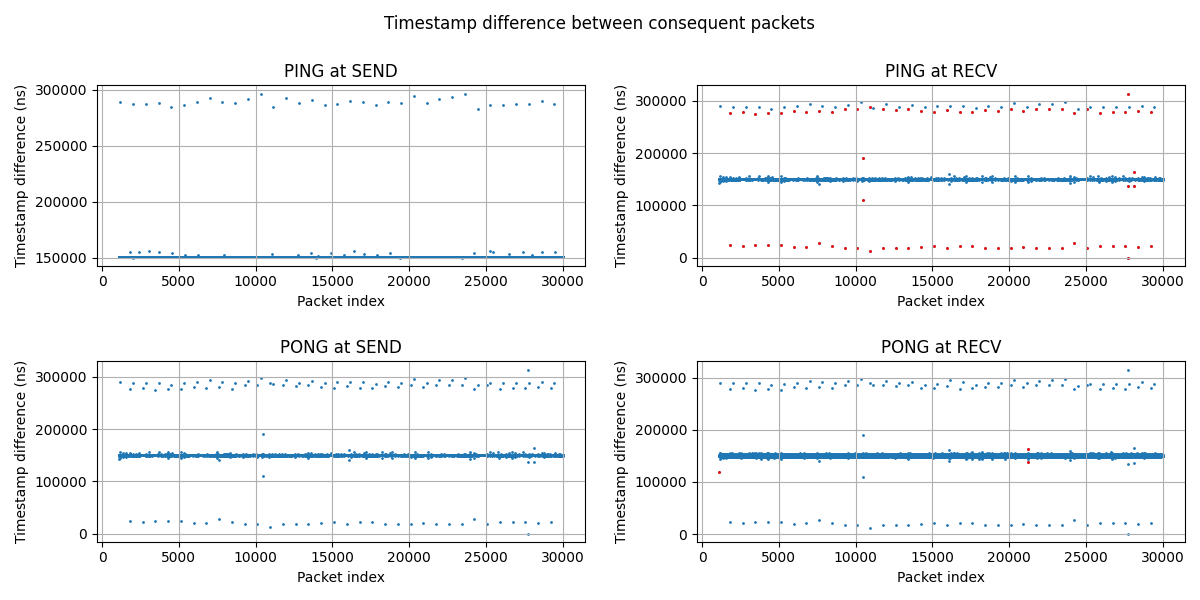

In [29]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_30k_150us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

Using threshold 13597.04214459827ns


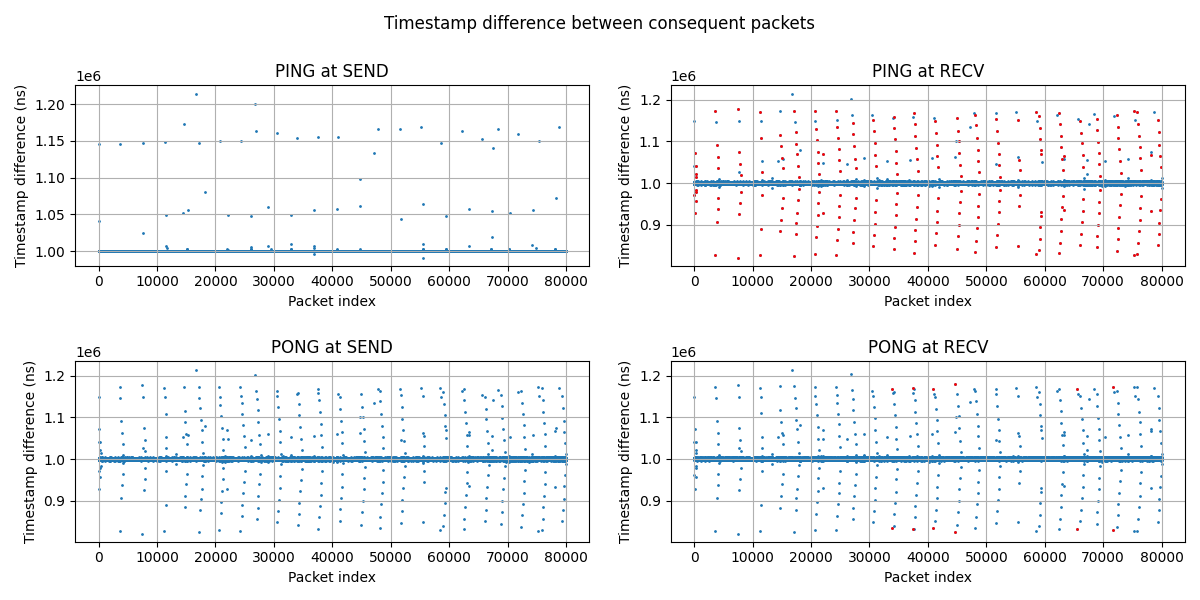

In [12]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/pure_80k_1ms_fullisol.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

## FiDE - post processing

Using threshold 10141.881880547053ns


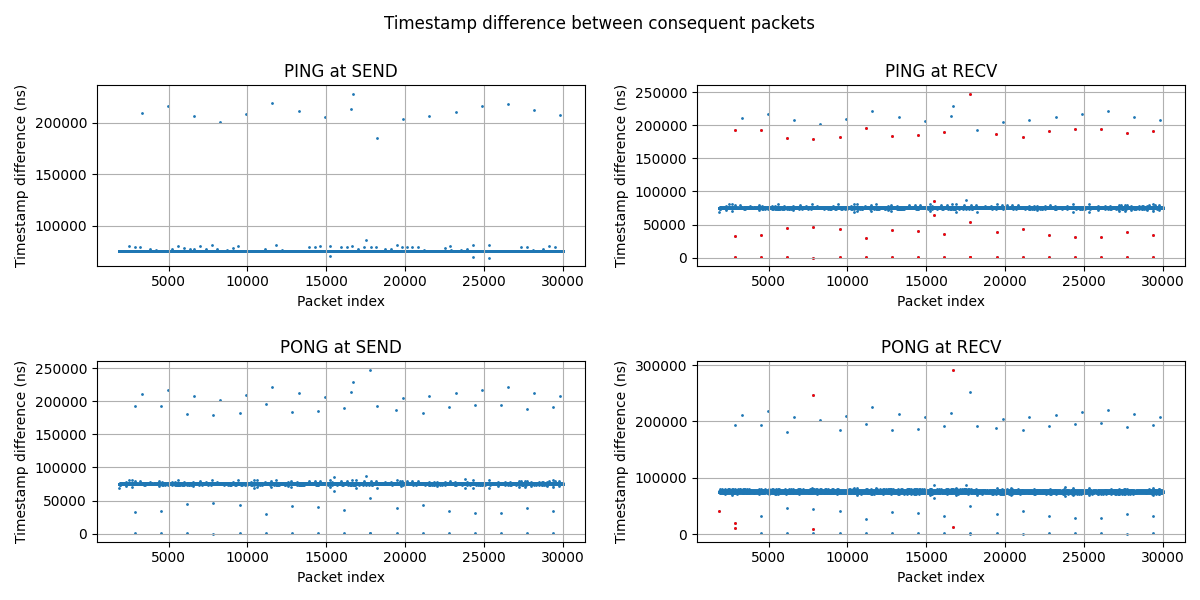

In [31]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_30k_75us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

In [3]:
import pandas as pd
df = pd.read_csv("../data-0424/fide_80k_1000us.csv")
df = df.drop("Unnamed: 5", axis=1)

Using threshold 9373.200313907955ns


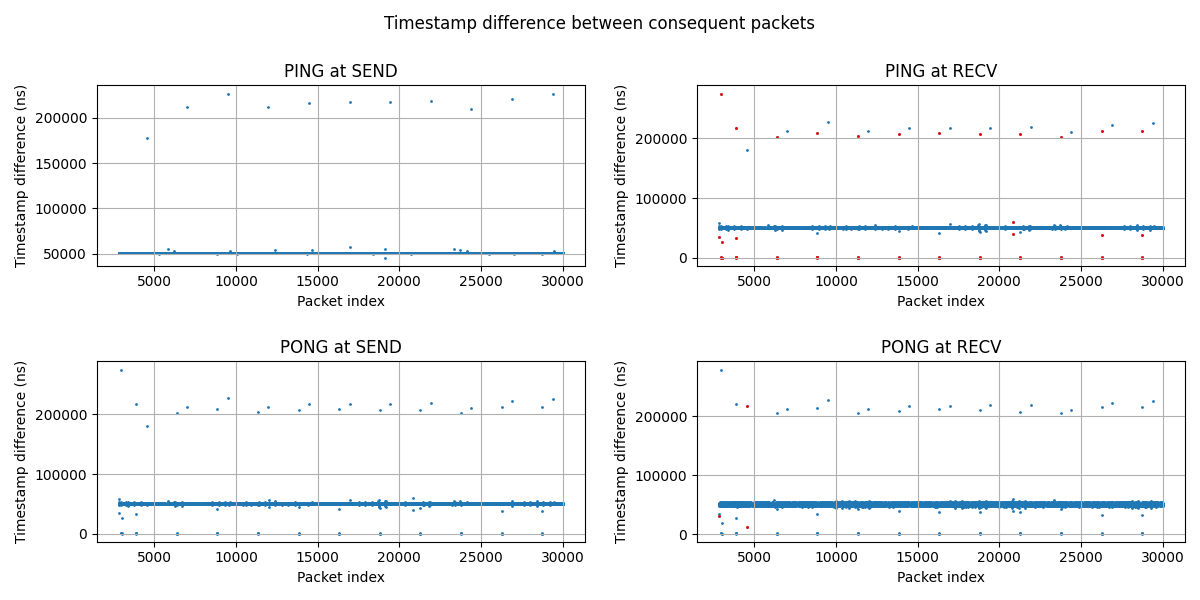

In [21]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/xsk_30k_50us_powermax.dat")
diffs = lib.compute_diffs(ts)
lib.plot_diffs(diffs, iters=settings.iters)

In [4]:
np.savetxt(r'../data-0424/fide_80k_1000us.dat', df.values, fmt="%d")

## IntelNIC
CloudLab server: c220g5, NIC model Intel X520-DA2

The NIC and/or its associated driver seem to be the determining factor in jitter results.

Using threshold 2999.25087102884ns


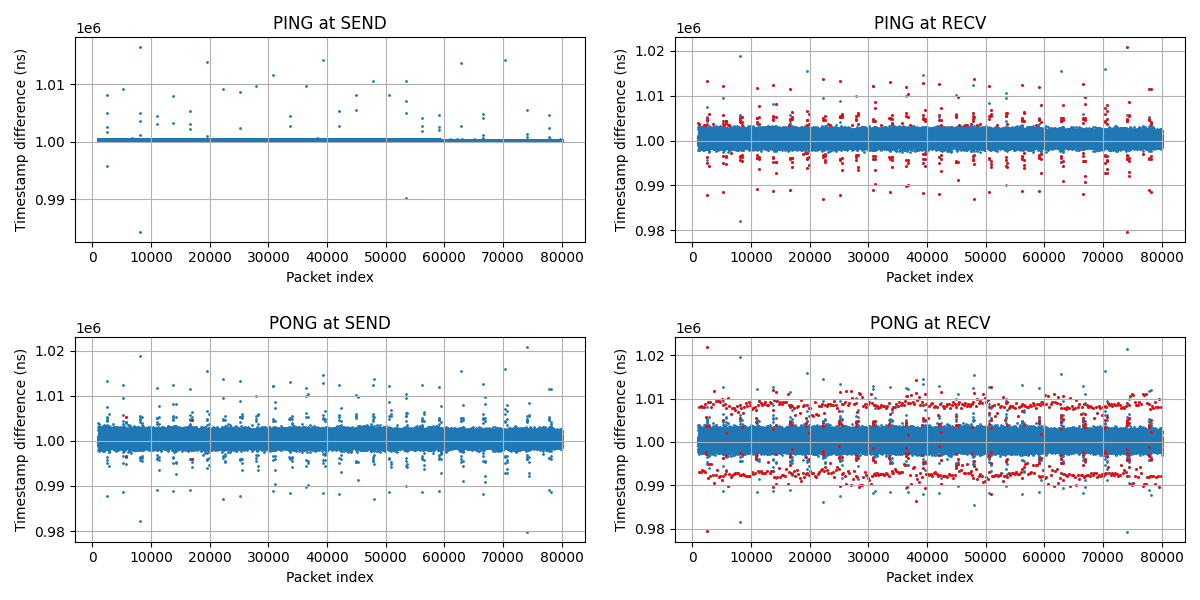

In [13]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/intelnic/pure_80k_1000us_maxpower.dat")
diffs = lib.compute_diffs(ts[100:])
tmp = lib.plot_diffs(diffs)

Using threshold 51164.06319415311ns


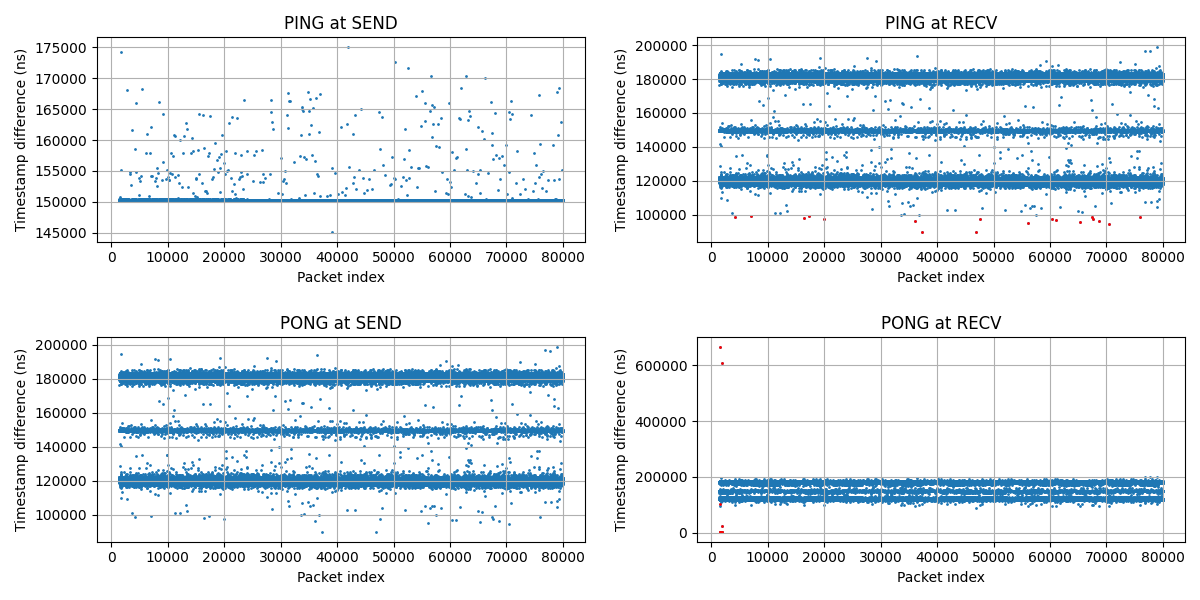

In [14]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../data-0424/intelnic/pure_80k_150us_maxpower.dat")
diffs = lib.compute_diffs(ts[100:])
tmp = lib.plot_diffs(diffs)

## Quick plot

Using threshold 4961431.798726753ns


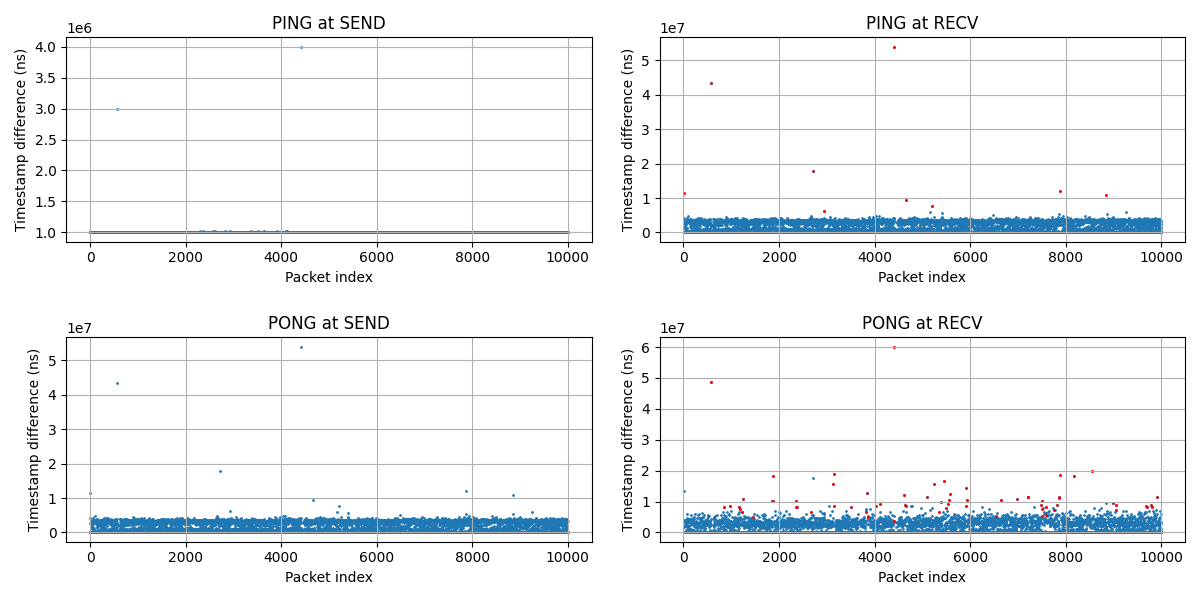

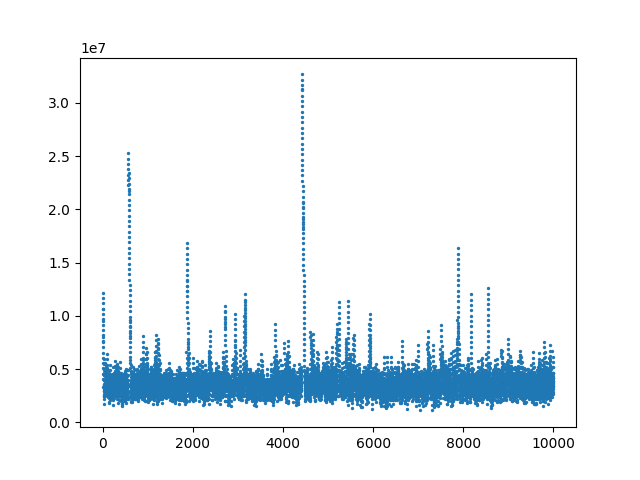

In [17]:
# settings = lib.Settings(1e4, 1e6, isol="no", kernel="6.6.19")
ts = lib.parse_timestamps("../../build/no-bypass/no-bypass.dat")
diffs = lib.compute_diffs(ts)
fig1 = lib.plot_diffs(diffs)
lats = lib.compute_latencies(ts)
# fig2 = lib.plot_latencies((lats, "stuff"))
fig, ax = plt.subplots()
ax.scatter(lats[:,0],lats[:,1], s=2)

In [16]:
np.average(lats)

np.float64(2788410.9729)

In [18]:
np.average(lats)

np.float64(1938152.8066533266)

In [33]:
ts = lib.parse_timestamps("../data-rpi/udp_0load.dat")
lats = lib.compute_latencies(ts) / 1000000

print('UDP (no-bypass) 0% load:\n')
print(f'min: {np.min(lats)}ms')
print(f'avg: {np.average(lats)}ms')
print(f'99.9th: {np.percentile(lats, 99.9)}ms')
print(f'99.99th: {np.percentile(lats, 99.99)}ms')
print(f'max: {np.max(lats)}ms')

UDP (no-bypass) 0% load:

min: 1e-06ms
avg: 1.8206182700499998ms
99.9th: 11.025974653000022ms
99.99th: 13.72543993139874ms
max: 14.723469ms
